In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 로드
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns = [df.columns[i][:-5] for i in range(4)]
df['target'] = iris['target']

In [3]:
df['sepal width'].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width, dtype: float64

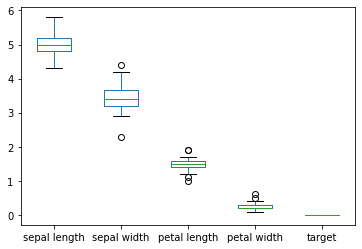

In [4]:
df[:50].boxplot(grid=False)
plt.show()

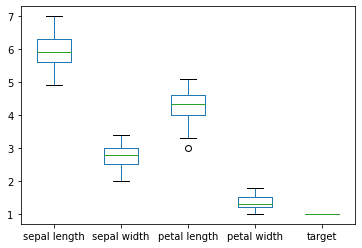

In [5]:
df[50:100].boxplot(grid=False)
plt.show()

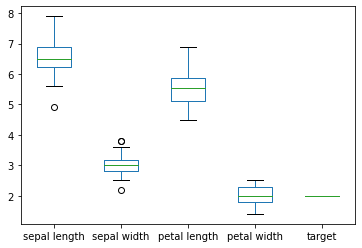

In [6]:
df[100:].boxplot(grid=False)
plt.show()

In [7]:
# 상관관계 분석
df2 = df
df2.corr()

,sepal length,sepal width,petal length,petal width,target
sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


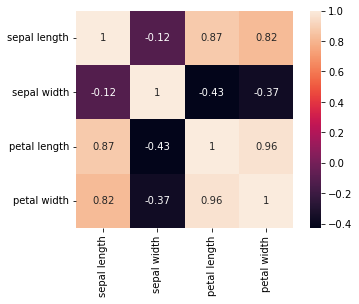

In [8]:
# 상관관계 시각화 by sns
sns.heatmap(data=df2.iloc[:,:-1].corr(), square=True, annot=True, cbar=True)
plt.show()

In [9]:
# 목표레이블의 클래스별 분포를 확인
df2['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

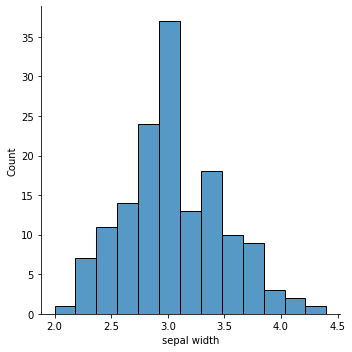

In [10]:
# seaborn에 있는 displot함수를 이용해서 히스토그램을 그려보자
sns.displot(x='sepal width', kind='hist', data=df2)
plt.show()

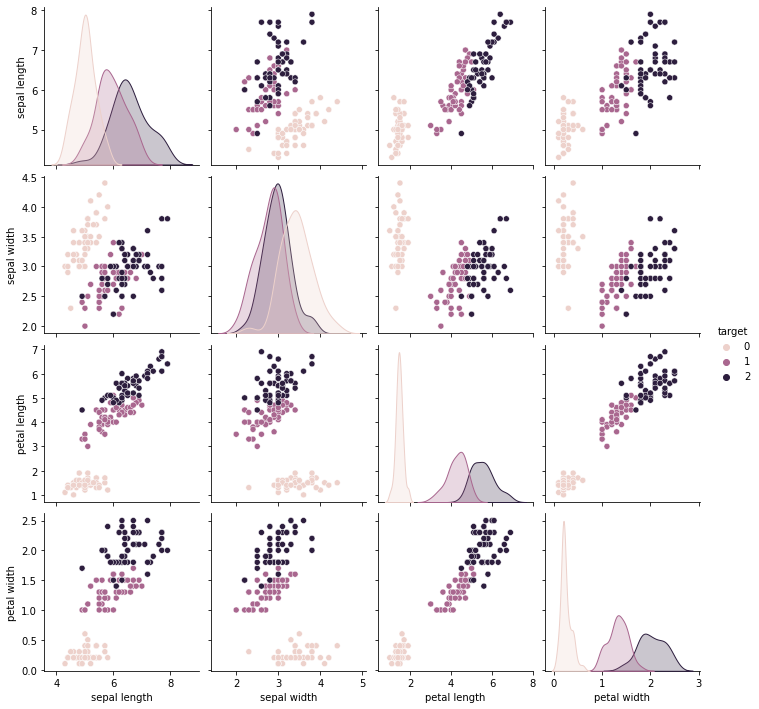

In [11]:
# seaborn함수에서 밀도
warnings.filterwarnings("ignore")
sns.pairplot(df2, hue='target', diag_kind='kde', size=2.5)
plt.show()

In [12]:
# 위 자료를 바탕으로 petal width와 petal length를 이용해 classification
x_data = df2.loc[:, ['petal width', 'petal length']]
y_data = df2.loc[:, 'target']
x_data.shape, y_data.shape

((150, 2), (150,))

In [13]:
x_train, x_target, y_train, y_target = train_test_split(x_data, y_data, random_state=100, test_size=0.3)

In [14]:
# KNN(k최근접 알고리즘)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# 하이퍼 파라메터 튜닝
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [16]:
y_pred = knn.predict(x_target)
y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [17]:
# 성능평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_pred=y_pred, y_true=y_target)
print("Accuracy", round(knn_acc, 4))

Accuracy 0.9556


In [18]:
# 분류 알고리즘 SVM
# SVM : 데이터 셋의 각 피쳐벡터들이 고유의 축을 갖는 벡터 공간
# 각 군집까지의 margin을 최대한 멀리 유지하는 경계면을 찾는다 => 분류가 명확해진다

from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [19]:
# 예측
y_svc_pred = svc.predict(x_target)
print("예측값:", y_svc_pred[:5])
print("실제값:", y_target[:5])

# 성능평가
svc_acc = accuracy_score(y_true=y_target, y_pred=y_svc_pred)
print("Accuracy: %.4f"%svc_acc)

예측값: [2 0 2 0 2]
실제값: 128    2
11     0
118    2
15     0
123    2
Name: target, dtype: int32
Accuracy: 0.9556


In [20]:
compare = accuracy_score(y_true=y_pred, y_pred=y_svc_pred)
print(compare)

1.0


In [21]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
# 로지스틱 회귀
# sigmoid 함수의 출력값(0-1사이) 각 분류 클래스에 속하게 될 확률
# 1에 가까우면 해당 클래스로 분류, 0에 가까우면 반대로 분류
# overfit이 발생하면 L1, L2 규제 알고리즘 사용한다

from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

LogisticRegression()

In [23]:
# 예측
y_lrc_pred = lrc.predict(x_target)
print("예측값:", y_lrc_pred[:5])

# 성능평가
lrc_acc = accuracy_score(y_true=y_target, y_pred=y_lrc_pred)
print("Accuracy %.4f"%lrc_acc)

예측값: [2 0 2 0 2]
Accuracy 0.9556


In [24]:
# 각 클래스에 속할 확률값을 예측
y_lrc_prob = lrc.predict_proba(x_target)
y_lrc_prob

array([[2.02392472e-05, 6.24728041e-02, 9.37506957e-01],
       [9.53572256e-01, 4.64273420e-02, 4.01779704e-07],
       [1.90762663e-08, 1.87536316e-03, 9.98124618e-01],
       [9.61585499e-01, 3.84140550e-02, 4.45679543e-07],
       [9.54708906e-04, 4.30017846e-01, 5.69027445e-01],
       [9.92888317e-07, 1.20638184e-02, 9.87935189e-01],
       [9.64954140e-01, 3.50456761e-02, 1.84407671e-07],
       [9.71941730e-01, 2.80581181e-02, 1.52075335e-07],
       [7.24602278e-05, 1.56574456e-01, 8.43353084e-01],
       [9.71062562e-01, 2.89372339e-02, 2.04136153e-07],
       [9.77568492e-01, 2.24313828e-02, 1.25231042e-07],
       [4.89606229e-05, 7.35230833e-02, 9.26427956e-01],
       [9.50677748e-01, 4.93215287e-02, 7.23062836e-07],
       [9.71941730e-01, 2.80581181e-02, 1.52075335e-07],
       [7.88143544e-05, 9.11341501e-02, 9.08787036e-01],
       [1.13539031e-02, 9.09489136e-01, 7.91569612e-02],
       [2.86539186e-02, 9.52706261e-01, 1.86398200e-02],
       [7.71820910e-04, 4.37362

In [25]:
# decision tree
# 트리 알고리즘 사용
# 트리 각 분기점(node)에는 데이터셋의 피쳐(설명변수)를 하나씩 위치시킨다
# max_depth 3을 기본값으로 설정한다 => 트리의 깊이가 너무 깊어지면 훈련데이터에 과적합이 일어난다

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(x_train, y_train)

dtc_pred = dtc.predict(x_target)
print("예측값:", dtc_pred[:5])

dtc_acc = accuracy_score(y_target, dtc_pred)
print("Accuracy: %.4f"%dtc_acc)

dtc_pred_proba = dtc.predict_proba(x_target)

예측값: [2 0 2 0 2]
Accuracy: 0.9556


In [26]:
dtc_pred_proba

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

## ensemble 모델
- 여러개의 모델이 예측한 값을 결합하여 최종 예측값을 결정하는 방법

### voting(3개의 모델을 사용)
- '같은 데이터'를 사용해서 학습옵션 중에 hard를 설정하면 3개 모델이 예측한 값 중에서 다수결(hard)/평균치(soft)로 분류를 정한다

### bagging (=> RandomForest)
- 데이터를 분할하여 샘플링 된 서로 다른 데이터를 각각 학습

In [27]:
# voting
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN', knn), ('SVM', svc), ('DT', dtc)], voting='hard')

In [28]:
hvc.fit(x_train, y_train)
y_hvc_pred = hvc.predict(x_target)
print("예측값:", y_hvc_pred[:5])

# 성능평가
hvc_acc = accuracy_score(y_target, y_hvc_pred)
print("Accuracy: %.4f"%hvc_acc)

예측값: [2 0 2 0 2]
Accuracy: 0.9556


In [29]:
# 배깅 알고리즘을 이용한 RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=100)
rfc.fit(x_train, y_train)

y_rfc_pred = rfc.predict(x_target)
print("예측값:", y_rfc_pred[:5])

# 성능평가
y_rfc_acc = accuracy_score(y_target, y_rfc_pred)
print("Accuracy: %.4f"%y_rfc_acc)

예측값: [2 0 2 0 2]
Accuracy: 0.9556


### 앙상블 모델 -> 부스팅(XGBoost)
- 여러개의 약한 학습기(가벼운 모델)을 순차적으로 학습한다
- 잘못 예측한 데이터에 대한 예측 오차를 줄일 수 있는 방향으로 모델을 계속 update한다
- 얘는 여러 모델이 동시에 학습하지 않고, 순서대로 학습한다는 점에서 bagging과 다르다

### XGBoost
- 속도가 빠르고 예측력이 상당히 좋은 편

In [30]:
!pip install xgboost

In [31]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=50, max_depth=3, random_state=20)
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=20, reg_alpha=0, ...)

In [32]:
y_xgbc_pred = xgbc.predict(x_target)
print("예측값:", y_xgbc_pred[:5])

# 성능평가
y_xgbc_acc = accuracy_score(y_target, y_xgbc_pred)
print("Accuracy: %.4f"%y_xgbc_acc)

예측값: [2 0 2 0 2]
Accuracy: 0.9778


### 교차검증
- 학습데이터 일부를 검증데이터로 사용하는 방법을 hold-out 교차검증
- 검증데이터는 모델 학습에 사용되지 않은 데이터... 모델의 일반화 성능을 평가하는데 사용
- 결국은 테스트 데이터에 대한 예측력을 높여준다...

In [33]:
# 위에서 나눈 x_train을 7:3으로 분할해주자
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=20)

In [34]:
x_tr.shape, x_val.shape, y_tr.shape, y_val.shape

((73, 2), (32, 2), (73,), (32,))

In [35]:
# RandomForest에 적용해볼게
rfc = RandomForestClassifier(max_depth=3, random_state=20)
rfc.fit(x_tr, y_tr)

# 예측
y_tr_pred = rfc.predict(x_tr)
y_val_pred = rfc.predict(x_val)

# 검증
tr_acc = accuracy_score(y_tr, y_tr_pred)
val_acc = accuracy_score(y_val, y_val_pred)
tr_acc, val_acc

(0.9863013698630136, 0.90625)

In [36]:
# 예측
y_test_pred = rfc.predict(x_target)
test_acc = accuracy_score(y_target, y_test_pred)
test_acc

0.9555555555555556

### 교차검증-> k-fold
- k-fold는 hold-out을 여러번 반복하는 방법
- 랜덤포레스트를 k-fold 교차검증으로 평가

In [37]:
from sklearn.model_selection import KFold
kfold = KFold()

count = 1
result = []
for tr_index, val_index in kfold.split(x_train, y_train):

    # 훈련용 데이터와 검증용 데이터를 행 인덱스 기준으로 추출
    x_tr, x_val = x_train.iloc[tr_index,:], x_train.iloc[val_index, :]
    y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
    
    # 학습
    rfc = RandomForestClassifier()
    rfc.fit(x_tr, y_tr)
    
    # 검증
    y_val_predic = rfc.predict(x_val)
    val_acc = accuracy_score(y_val, y_val_predic)
    result.append(val_acc)
    print(f"{count}Fold Accuracy: {val_acc}")
    count += 1

1Fold Accuracy: 0.9523809523809523
2Fold Accuracy: 0.9047619047619048
3Fold Accuracy: 0.9523809523809523
4Fold Accuracy: 1.0
5Fold Accuracy: 1.0


In [38]:
# 위의 5개 검증 정확도의 평균
import numpy as np
np.mean(result)

0.9619047619047618

In [39]:
# Regression...
warnings.filterwarnings("ignore")
from sklearn import datasets
housing = datasets.load_boston()

In [40]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [41]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['target'])
data.shape, target.shape

((506, 13), (506, 1))

In [42]:
df = pd.concat([data, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


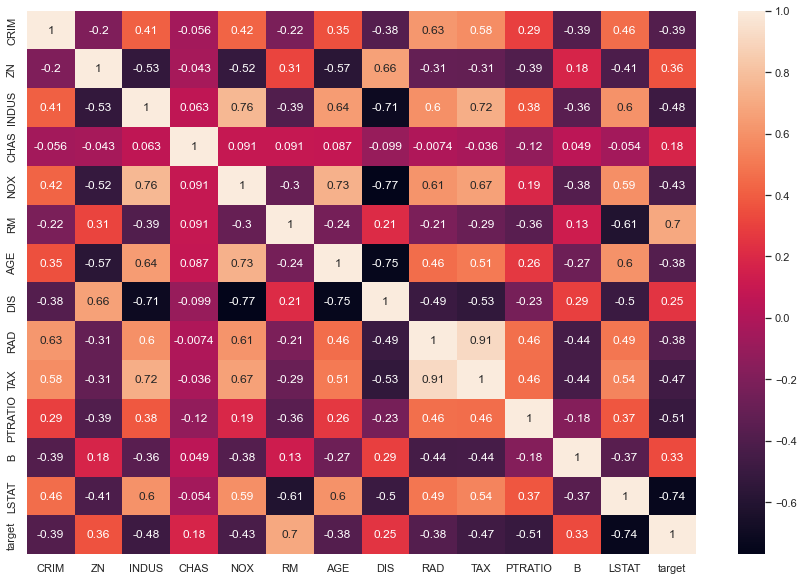

In [43]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.0)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [44]:
# target(목표변수)열과 상관계수가 높은 순서대로 열 이름과 상관계수를 출력
df.corr().sort_values(by='target')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
LSTAT,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929


In [45]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [46]:
plot_cols = df.corr().loc[:'LSTAT', 'target'].abs().sort_values(ascending=False).index[:4]
plot_df = df.loc[:, plot_cols]
plot_df = pd.concat([df['target'], plot_df], axis=1)

plot_df.head()

,target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


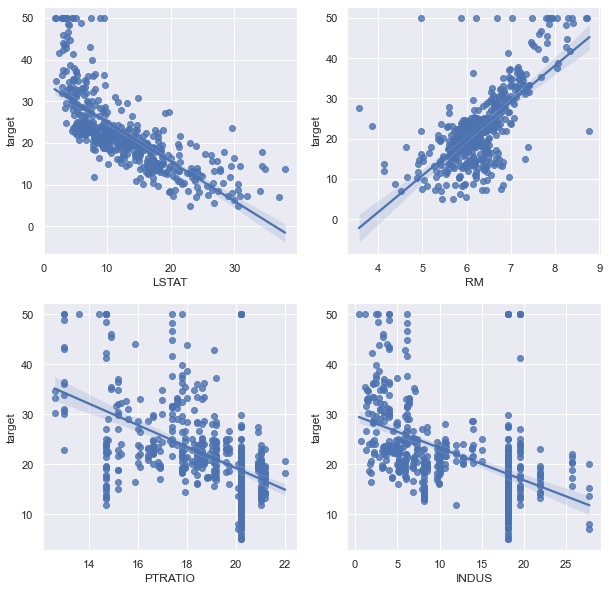

In [47]:
# seaborn 함수의 regplot 함수로 선형회귀 선을 산점도에 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_df.columns[1:]):
    ax1 = plt.subplot(2,2, idx+1)
    sns.regplot(x=col, y=plot_df.columns[0], data=plot_df, ax=ax1)
plt.show()

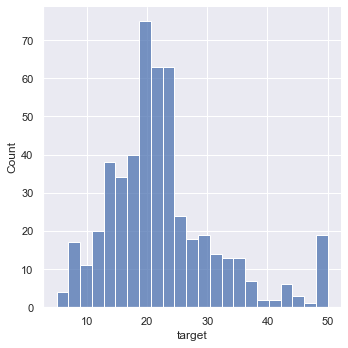

In [48]:
# target에 대해서 좀 더 확인이 필요... 분포를 시각화해보자
# target 데이터 분포
sns.displot(x='target', kind='hist', data=df)
plt.show()

In [49]:
# 데이터 전처리
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 학습 데이터만 스케일링
df_scaled = df.iloc[:, :-1]
df_scaled = scaler.fit_transform(df_scaled)
df.iloc[:,:-1] = df_scaled
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,22.4
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,20.6
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,23.9
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,22.0


In [50]:
# 상관관계나 시각화를 해봤더니, 유의미한 변수가 두개정도 보인다 => LSTAT, RM
x_data = df.loc[:, ['LSTAT', 'RM']]
y_data = df['target']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

In [51]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 2), (127, 2), (379,), (127,))

In [52]:
# 베이스라인 모델 : 선형회귀
# 선형회귀 => 기울기와 절편
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.intercept_

18.061990105535976

In [53]:
lr.coef_ # 0번째부터 최고차항 계수

array([-25.37706604,  23.41878616])

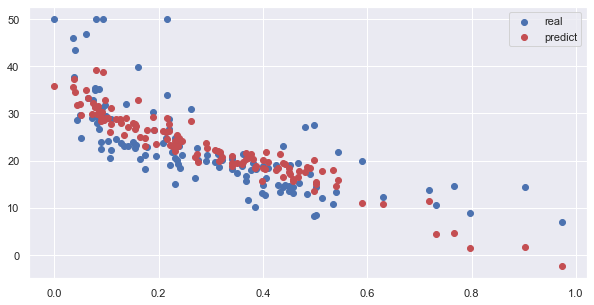

In [54]:
# 테스트 데이터로 예측을 하고 값을 얻어서 실제와 비교 => 시각화
y_test_pred = lr.predict(x_test)
plt.figure(figsize=(10, 5))
plt.scatter(x_test['LSTAT'], y_test, label='real', c='b')
plt.scatter(x_test['LSTAT'], y_test_pred, label='predict', c='r')
plt.legend(loc='best')
plt.show()

#### 잔차(residue) : 실제값과 예측값의 차이
#### MAE(Mean Absolute Error): 잔차 절댓값의 평균
#### MSE(Mean Squared Error) : 잔차 제곱의 평균
#### RMSE(Root Mean Squared Error) : MSE의 제곱근

In [55]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse, test_mse

(31.30071014202765, 28.74422877221065)

In [56]:
# cross_val_score를 이용하면 k-fold 과정 간단하게 수행
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
scores = cross_val_score(lr, x_train, y_train, cv=5)
print("개별평가", np.round(scores, 4))
print("평균", np.mean(scores))

개별평가 [0.505  0.7036 0.7043 0.5491 0.6021]
평균 0.6128278781485328


In [57]:
# 과대적합(Overfitting) & 과소적합(Underfitting)
# 단항식이 아니라 다항식 선형회귀.. 복잡한 구조를 가짐
x_train

,LSTAT,RM
465,0.342163,0.421153
116,0.284492,0.501054
168,0.258554,0.528454
19,0.263521,0.415022
267,0.157561,0.907454
...,...,...
241,0.294426,0.485534
444,0.608720,0.439356
95,0.135762,0.587086
24,0.402042,0.452769


In [58]:
# 2차 다항식으로 변환
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=4) # degree가 과하게 커지면 과대적합이 발생
x_train_poly = pf.fit_transform(x_train)
print("원본데이터: ", x_train.shape)
print("이차다항식 변환 데이터: ", x_train_poly.shape)

# 선형회귀 학습
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"train mse : {train_mse}")
print(f"test mse : {test_mse}")

원본데이터:  (379, 2)
이차다항식 변환 데이터:  (379, 15)
train mse : 16.151821351956837
test mse : 23.850005779265064


In [59]:
def get_mse(degree):
    pf = PolynomialFeatures(degree=degree) # degree가 과하게 커지면 과대적합이 발생한다
    x_train_poly = pf.fit_transform(x_train)

    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)

    y_train_pred = lr.predict(x_train_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)

    x_test_poly = pf.fit_transform(x_test)
    y_test_pred = lr.predict(x_test_poly)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return train_mse, test_mse

In [60]:
get_mse(4)

(16.151821351956837, 23.850005779265064)

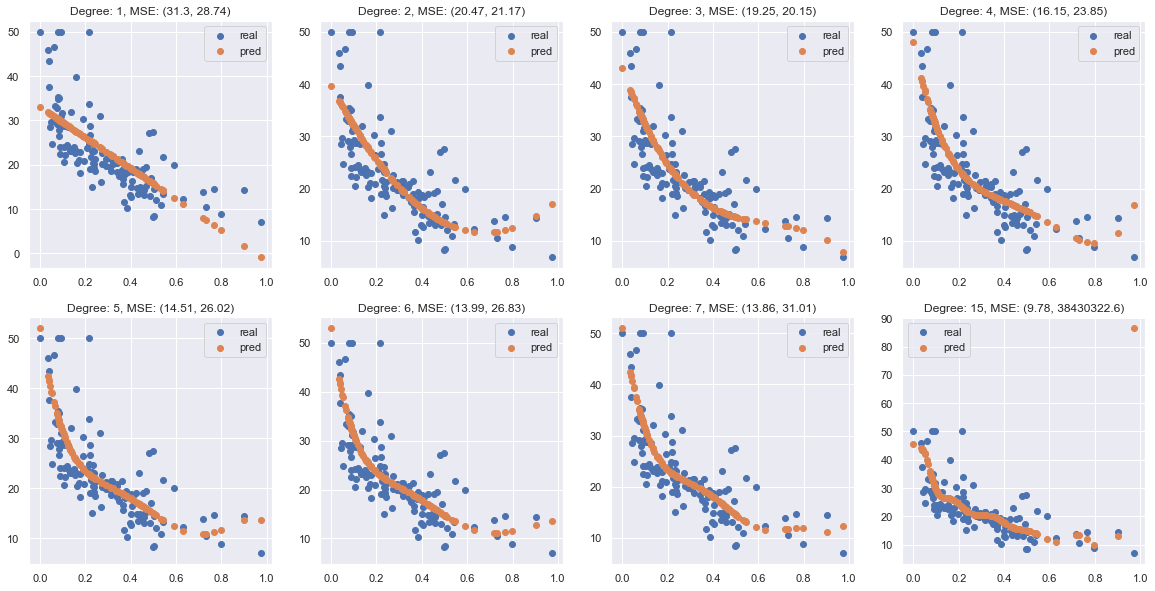

In [61]:
plt.figure(figsize=(20,10))
for n, deg in enumerate([1,2,3,4,5,6,7,15]):
    plt.subplot(2, 4, n+1)
    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['LSTAT']])
    x_test_poly = pf.fit_transform(x_test.loc[:, ['LSTAT']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)
    plt.scatter(x_test.loc[:, ['LSTAT']], y_test, label='real')
    plt.scatter(x_test.loc[:, ['LSTAT']], y_test_pred, label='pred')
    scores = np.round(get_mse(deg), 2)
    plt.title(f"Degree: {deg}, MSE: {scores[0], scores[1]}")
    plt.legend(loc='best')
plt.show()

### 규제(Regulation)
- 모델을 설명하는 각 피쳐가 모델의 예측 결과에 미치는 영향력을 가중치(회귀계수)로 표현한다
- 이러한 가중치들이 커지면 패널티를 부과해서 가중치를 낮은 수준으로 유지시키는 것

#### L1 Regulation
- 모델의 가중치 절댓값합에 패널티를 부과

> LASSO

    - L1 알고리즘을 적용한 규제
    


#### L2 Regulation
- 모델의 가중치 제곱합에 패널티를 부과

> RIDGE

    - L2 알고리즘을 적용한 규제
    - 이때 가중치 제곱합을 alpha로 둔다

In [62]:
# Ridge 규제
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=4)

rdg.fit(x_train_poly, y_train)
y_train_poly_pred = rdg.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_poly_pred)
print(f"train mse: {train_mse}")

y_test_poly_pred = rdg.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_poly_pred)
print(f"test mse: {test_mse}")

train mse: 38.76880510267428
test mse: 40.89345463321951


In [63]:
# Lasso 규제
from sklearn.linear_model import Lasso
ls = Lasso(alpha=2)

ls.fit(x_train_poly, y_train)
y_train_poly_pred = ls.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_poly_pred)
print(f"train mse: {train_mse}")

y_test_poly_pred = ls.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_poly_pred)
print(f"test mse: {test_mse}")

train mse: 85.49244937030514
test mse: 81.2226300970042


In [64]:
# ElasticNet : L1 + L2를 모두 적용한 선형회귀 모델
# alpha는 L2 규제 강도와 L1 규제 강도의 합
# l1_ratio : L1 규제 강도의 상대적 비율을 조정
from sklearn.linear_model import ElasticNet

In [65]:
ela = ElasticNet(alpha=0.001, l1_ratio=0.8)
ela.fit(x_train_poly, y_train)

y_train_pred = ela.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"train mse: {train_mse}")

y_test_pred = ela.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"test mse: {test_mse}")

train mse: 29.07169238490689
test mse: 34.333225757969075
